In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install medpy
import numpy as np
from medpy.io import load
import matplotlib.pyplot as plt
(image_data, image_header) = load('/content/drive/My Drive/OASIS Data/mwrc1OAS1_0001_MR1_mpr_anon_fslswapdim_bet.nii')

########## Affichage des imges en 2D




Mounted at /content/drive
     |████████████████████████████████| 151 kB 5.3 MB/s 
     |████████████████████████████████| 48.4 MB 1.5 MB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754485 sha256=7b96d4bc9efe1fb9fda5ecd51fc1e3635ceacfab03b61ae6e8a41d44f2f7c0ec
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy


ImageLoadingError: ignored

Sagittal


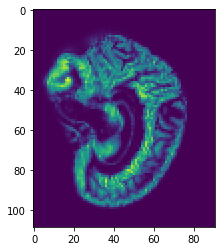

In [ ]:
#dim ==> x,y,z
print("Sagittal")
plt.imshow(image_data[40])

Coronal


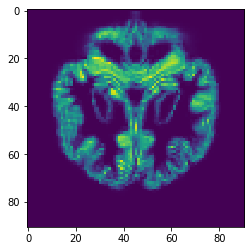

In [ ]:
#dim ==> y,z,x
print("Coronal")
plt.imshow(np.moveaxis(image_data, 0, 2)[40])

Axial


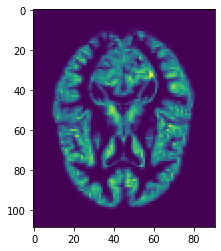

In [ ]:
#dim ==> z,y,x
print("Axial")
plt.imshow(np.moveaxis(np.moveaxis(image_data, 0, 2),0,1)[40])

In [ ]:
#####Packages
!pip install medpy
import os
import math
import matplotlib.pyplot as plt
from medpy.io import load
import pandas as pd
import numpy as np

######Il faut monter votre drive avec google Colab
from google.colab import drive
drive.mount('/content/drive')

######Fonction qui génére dataset csv selon le type voulu (Sagital, Axial, Coronal)
#type_data ==> "sagittal" ou "coronal" ou "axial"
#path_images ==> chemin des images
#input_csv ==> csv ou se trouve le label "OASIS['CDR']"
#path_csv ==>  chemin ou on veut stocker le csv

def generer_data(type_data,path_images,input_csv,path_csv):
     OASIS = pd.read_csv(input_csv)
     os.chdir(path_images)
     
     (image_data, image_header) = load(path_images+"/mwrc1OAS1_0002_MR1_mpr_anon_fslswapdim_bet.nii")
     if (type_data.lower() == "sagittal") :
            image_data=np.moveaxis(image_data, 0, 0)[40]
     if (type_data.lower() == "coronal") :
            image_data=np.moveaxis(image_data, 0, 2)[40]  
     if (type_data.lower() == "axial") :
            image_data=np.moveaxis(np.moveaxis(image_data, 0, 2),0,1)[40] 
     Tid = np.array([], dtype=np.float64)
     Tid = image_data[:,:].flatten()
     Tid = pd.Series(list(Tid))
     X = pd.DataFrame([Tid], columns = list(range(len(Tid))))
     X['Label'] = 1
     for element in os.listdir(os.getcwd()):
         if (element.endswith(".nii")):
              if math.isnan((OASIS['CDR'][OASIS['ID'] == element.split('mwrc1')[1].split('_mpr')[0]]).values[0]) == False:
                Result = (OASIS['CDR'][OASIS['ID'] == element.split('mwrc1')[1].split('_mpr')[0]]).values[0]
                if Result == 0.0:
                  L = pd.Series([1])
                elif Result == 0.5:
                  L = pd.Series([2])
                elif Result == 1.0:
                  L = pd.Series([3])
                else:
                  continue
                (image_data, image_header) = load(element)
                Tid = np.array([], dtype=np.float64)
                if (type_data.lower() == "sagittal") :
                     image_data=np.moveaxis(image_data, 0, 0)[40]
                if (type_data.lower() == "coronal") :
                     image_data=np.moveaxis(image_data, 0, 2)[40]  
                if (type_data.lower() == "axial") :
                     image_data=np.moveaxis(np.moveaxis(image_data, 0, 2),0,1)[40]
                Tid = image_data[:,:].flatten()
                Tid = pd.Series(list(Tid))
                X = pd.DataFrame(np.insert(X.values, 0, values=[Tid.append(L)], axis=0))
                os.chdir(path_csv)
                X.to_csv(type_data+".csv")
                
     





In [ ]:
########Appel de la fonction avec :
#type_data = "sagittal"
#path_images = "/content/drive/My Drive/test"   (chemin des images)
#input_csv = "/content/drive/My Drive/test/oasis_cross-sectional.csv"  (csv ou se trouve le label "OASIS['CDR']")
#path_csv =  /content/drive/My Drive/test"    (chemin ou on veut stocker le csv)

generer_data("sagittal","/content/drive/My Drive/test","/content/drive/My Drive/test/oasis_cross-sectional.csv","/content/drive/My Drive/test")